<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




## Setup

#  Run Zero-Shot Vision Tasks with Florence-2

**Florence-2** is a novel **open-source** vision foundation model. This cutting-edge AI system represents a major advancement in computer vision, offering a unified approach to tackle a wide variety of visual tasks with unprecedented efficiency and accuracy.

Florence-2 excels in **zero-shot** and fine-tuning tasks such as **image captioning, visual object detection, grounding, and segmentation**, setting a new standard in the industry.

For ease of use we divided the model into 4 algorithms according their tasks:
- [infer_florence_2_caption](https://github.com/Ikomia-hub/infer_florence_2_caption)
- [infer_florence_2_detection](https://github.com/Ikomia-hub/infer_florence_2_detection)
- [infer_florence_2_segmentation](https://github.com/Ikomia-hub/infer_florence_2_segmentation)
- [infer_florence_2_ocr](https://github.com/Ikomia-hub/infer_florence_2_ocr)



**The Florence-2 algorithms require FlashAttention, which is currently only compatible with Linux OS.**











Please use a GPU for this tutorial.

In the menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [1]:
!nvidia-smi

Thu Aug 22 14:00:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

You need to install Ikomia Python API with pip


In [ ]:
!pip install ikomia

---

**-Google Colab ONLY- Restart runtime**

Click on the "RESTART RUNTIME" button at the end the previous window.

---

## Run Florence-2

In [3]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

### Inference with *infer_florence_2_caption*

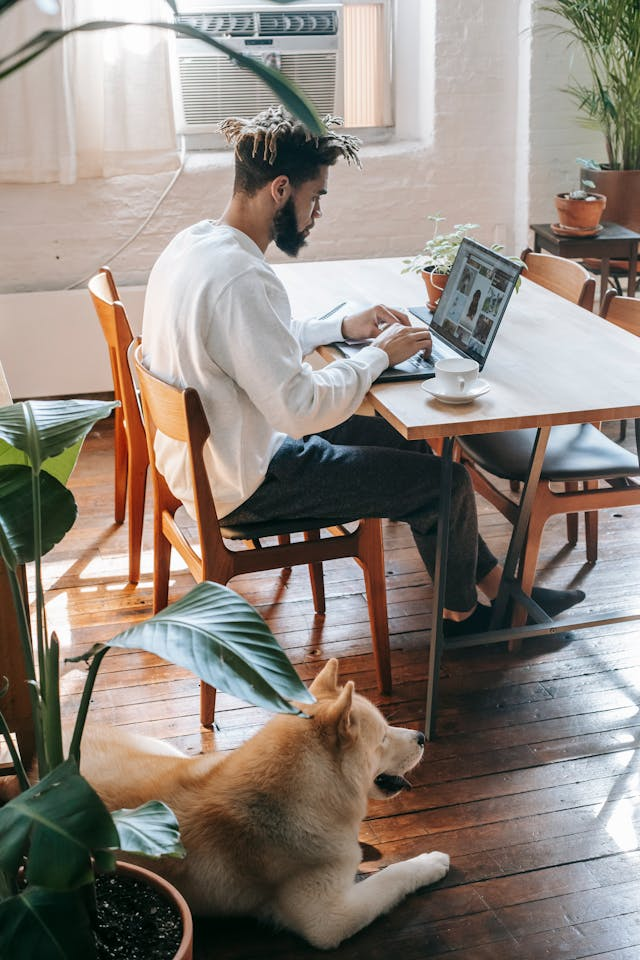

In [1]:
from PIL import Image
import requests
url = "https://images.pexels.com/photos/5749076/pexels-photo-5749076.jpeg?cs=srgb&dl=pexels-zen-chung-5749076.jpg&fm=jpg&w=640&h=960"
image = Image.open(requests.get(url, stream=True).raw)
image

#### Caption

In [5]:
# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name="infer_florence_2_caption", auto_connect=True)

algo.set_parameters({
    "model_name":"microsoft/Florence-2-large",
    "task_prompt":"CAPTION",
    "max_new_tokens":"1024",
    "num_beams":"3",
    "do_sample":"False",
    "early_stopping":"False",
    "cuda":"True"
})

# Run on your image
wf.run_on(url="https://images.pexels.com/photos/5749076/pexels-photo-5749076.jpeg?cs=srgb&dl=pexels-zen-chung-5749076.jpg&fm=jpg&w=640&h=960")

# Save output .json
caption_output = algo.get_output(0)
caption_output.save('caption_output.json')

pexels-photo-5749076.jpeg: 100%|██████████| 91.9k/91.9k [00:00<00:00, 10.5MiB/s]


{'<CAPTION>': 'A man sitting at a table with a laptop and a dog.'}
Workflow Untitled run successfully in 10813.870808 ms.


#### Detailed Caption

In [6]:
# Run on your image
algo.set_parameters({"task_prompt":"DETAILED_CAPTION"})

wf.run_on(url="https://images.pexels.com/photos/5749076/pexels-photo-5749076.jpeg?cs=srgb&dl=pexels-zen-chung-5749076.jpg&fm=jpg&w=640&h=960")

pexels-photo-5749076.jpeg: 100%|██████████| 91.9k/91.9k [00:00<00:00, 12.0MiB/s]


{'<DETAILED_CAPTION>': 'The image shows a man sitting at a table with a laptop computer in front of him, a cup and saucer on the table, and a dog laying on the floor beside him. There are also some plants in pots, a window with a curtain, and an air conditioner in the background.'}
Workflow Untitled run successfully in 2210.141012 ms.


#### More Detailed Caption

In [7]:
# Run on your image
algo.set_parameters({"task_prompt":"MORE_DETAILED_CAPTION"})

wf.run_on(url="https://images.pexels.com/photos/5749076/pexels-photo-5749076.jpeg?cs=srgb&dl=pexels-zen-chung-5749076.jpg&fm=jpg&w=640&h=960")

pexels-photo-5749076.jpeg: 100%|██████████| 91.9k/91.9k [00:00<00:00, 9.22MiB/s]


{'<MORE_DETAILED_CAPTION>': 'The image shows a young man sitting at a wooden table in a room with a large window in the background. He is wearing a white long-sleeved shirt and has a beard and dreadlocks. On the table, there is a laptop, a cup of coffee, and a small plant. A dog is lying on the floor next to the table. The room is decorated with potted plants and there is an air conditioning unit on the wall. The overall atmosphere of the room is cozy and relaxed.'}
Workflow Untitled run successfully in 2484.585096 ms.


### Inference with *infer_florence_2_detection*

#### Object Detection

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 26.0MiB/s]


Workflow Untitled run successfully in 15041.498403 ms.


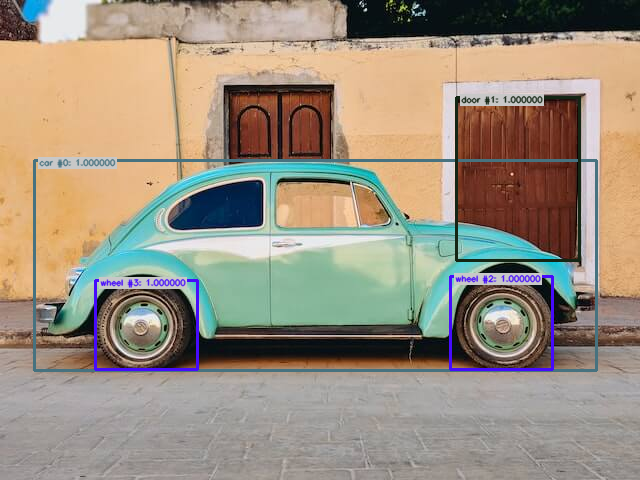

In [17]:
# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name="infer_florence_2_detection", auto_connect=True)

algo.set_parameters({
    "model_name":"microsoft/Florence-2-large",
    "task_prompt":"OD",
    "prompt":"",
    "max_new_tokens":"1024",
    "num_beams":"3",
    "do_sample":"False",
    "early_stopping":"False",
    "cuda":"True"
})

# Run on your image
wf.run_on(url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

# Display results
display(algo.get_image_with_graphics())

#### Dense Region Caption

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 21.2MiB/s]


Workflow Untitled run successfully in 925.547052 ms.


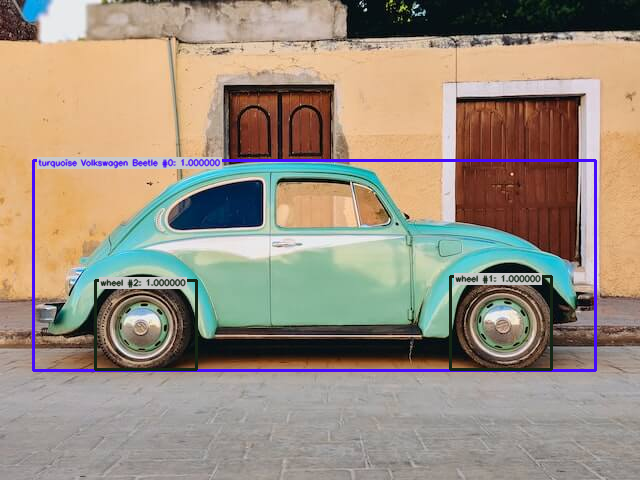

In [9]:
algo.set_parameters({"task_prompt":"DENSE_REGION_CAPTION"})

wf.run_on(url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

display(algo.get_image_with_graphics())

#### Region Proposal

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 20.1MiB/s]


Workflow Untitled run successfully in 1813.099871 ms.


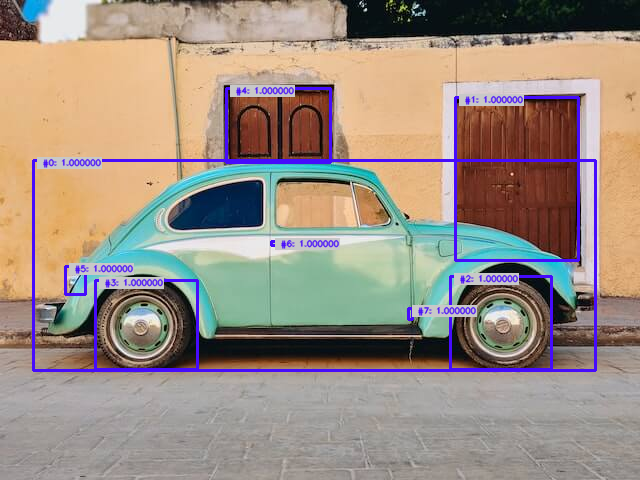

In [10]:
algo.set_parameters({"task_prompt":"REGION_PROPOSAL"})

wf.run_on(url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

display(algo.get_image_with_graphics())

#### Caption to Phrase Grounding

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 10.2MiB/s]


Workflow Untitled run successfully in 1230.051282 ms.


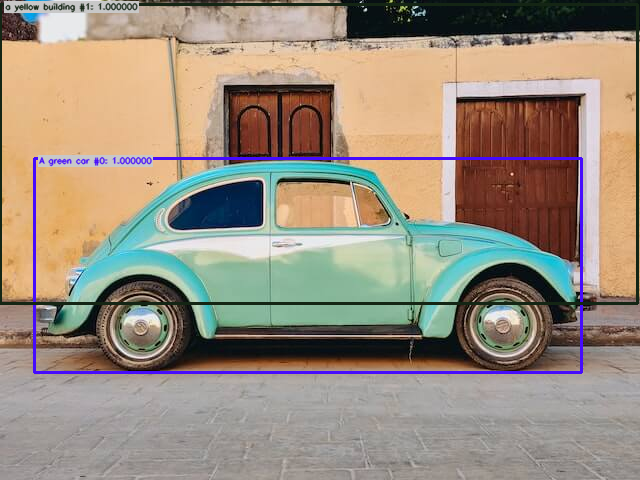

In [11]:
algo.set_parameters({
    "task_prompt":"CAPTION_TO_PHRASE_GROUNDING",
    "prompt":"A green car parked in front of a yellow building."
})

wf.run_on(url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

display(algo.get_image_with_graphics())

#### Open Vocabulary

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 14.7MiB/s]


Workflow Untitled run successfully in 1294.139807 ms.


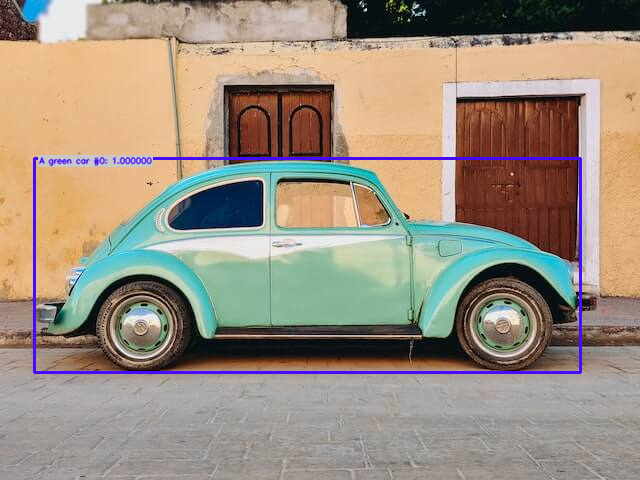

In [12]:
algo.set_parameters({
    "task_prompt":"OPEN_VOCABULARY_DETECTION",
    "prompt": "A green car"
})

wf.run_on(url="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

display(algo.get_image_with_graphics())

### Inference with *infer_florence_2_segmentation*

#### Refering Expression Segmentation

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 41.0MiB/s]


Workflow Untitled run successfully in 22172.754111 ms.


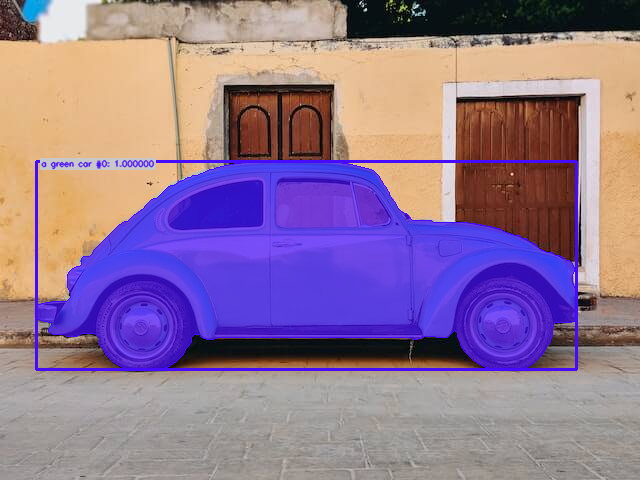

In [18]:
# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name="infer_florence_2_segmentation", auto_connect=True)

algo.set_parameters({
    "model_name":"microsoft/Florence-2-large",
    "task_prompt":"REFERRING_EXPRESSION_SEGMENTATION",
    "prompt":"a green car",
    "max_new_tokens":"1024",
    "num_beams":"3",
    "do_sample":"False",
    "early_stopping":"False",
    "cuda":"True"
})

# Run on your image
wf.run_on(url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

# Display results
display(algo.get_image_with_mask_and_graphics())

#### Region to Segmentation
The format is '<loc_x1><loc_y1><loc_x2><loc_y2>', [x1, y1, x2, y2] is the quantized corrdinates in [0, 999].

car.jpg: 100%|██████████| 38.2k/38.2k [00:00<00:00, 17.4MiB/s]


Workflow Untitled run successfully in 4722.921043 ms.


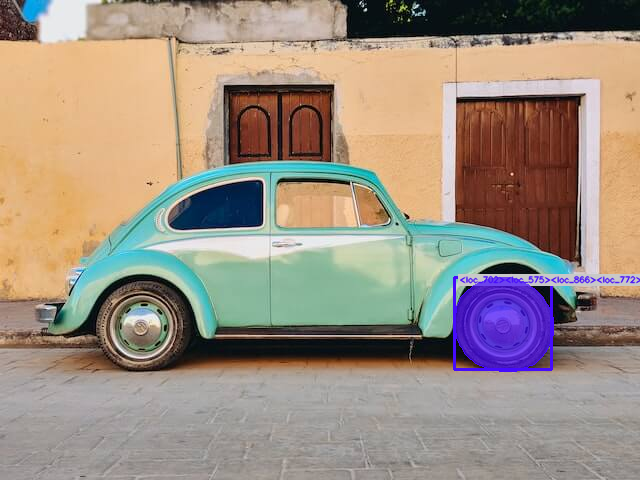

In [14]:
algo.set_parameters({
    "task_prompt":"REGION_TO_SEGMENTATION",
    "prompt":"<loc_702><loc_575><loc_866><loc_772>",
})

# Run on your image
wf.run_on(url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true")

# Display results
display(algo.get_image_with_mask_and_graphics())

### Inference with *infer_florence_2_ocr*

pexels-photo-5248077.jpeg: 100%|██████████| 28.9k/28.9k [00:00<00:00, 13.6MiB/s]


Workflow Untitled run successfully in 10594.445616 ms.


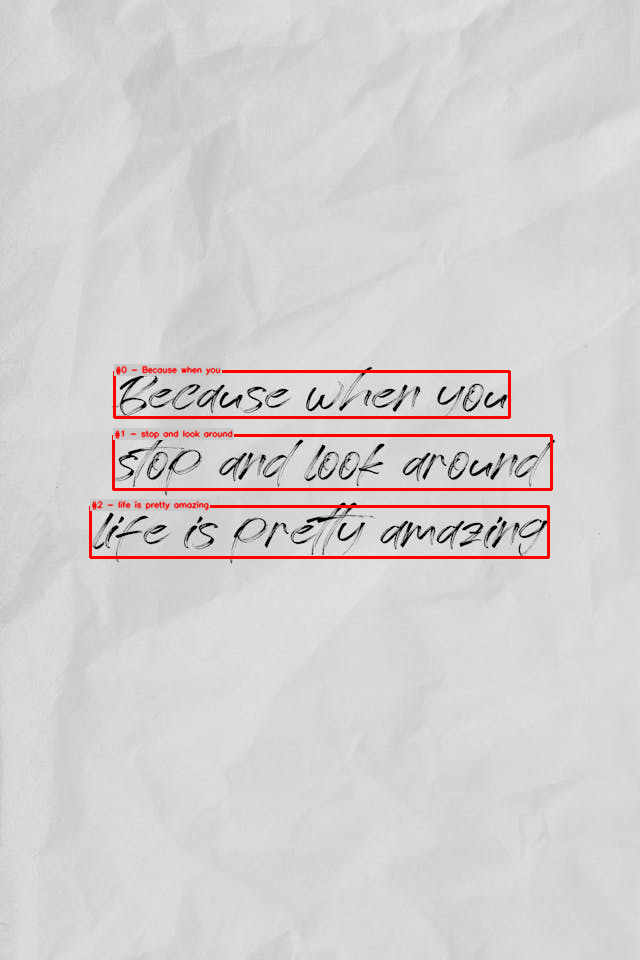

In [19]:
# Init your workflow
wf = Workflow()

# Add algorithm
algo = wf.add_task(name="infer_florence_2_ocr", auto_connect=True)

algo.set_parameters({
    "model_name":"microsoft/Florence-2-large",
    "max_new_tokens":"1024",
    "num_beams":"3",
    "do_sample":"False",
    "early_stopping":"False",
    "cuda":"True"
})

wf.run_on(url="https://images.pexels.com/photos/5248077/pexels-photo-5248077.jpeg?cs=srgb&dl=pexels-leeloothefirst-5248077.jpg&fm=jpg&w=640&h=960")

# Display results
img_output = algo.get_output(0)
recognition_output = algo.get_output(1)
display(img_output.get_image_with_mask_and_graphics(recognition_output), title="Florence-2 OCR")